## LSTM Example with Scalecast

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pylab as plt

%matplotlib inline

from scalecast.Forecaster import Forecaster

sns.set(rc={"figure.figsize": (15, 8)})

In [3]:
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
df = pd.read_csv("../../data/AirPassengers.csv")

# float型に変換
df["#Passengers"] = df["#Passengers"].astype("float64")
df = df.rename(columns={"#Passengers": "Passengers"})

# datetime型に変換にする
df.Month = pd.to_datetime(df.Month)

# データの中身を確認
df.head()

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


### EDA

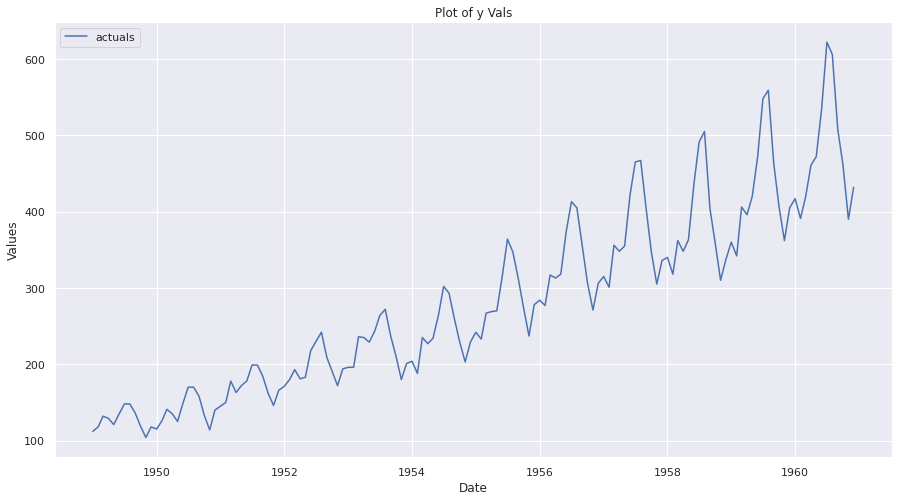

In [4]:
f = Forecaster(y=df["Passengers"], current_dates=df["Month"])
f.plot()

In [5]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    CILevel=0.95
    BootstrapSamples=100
)

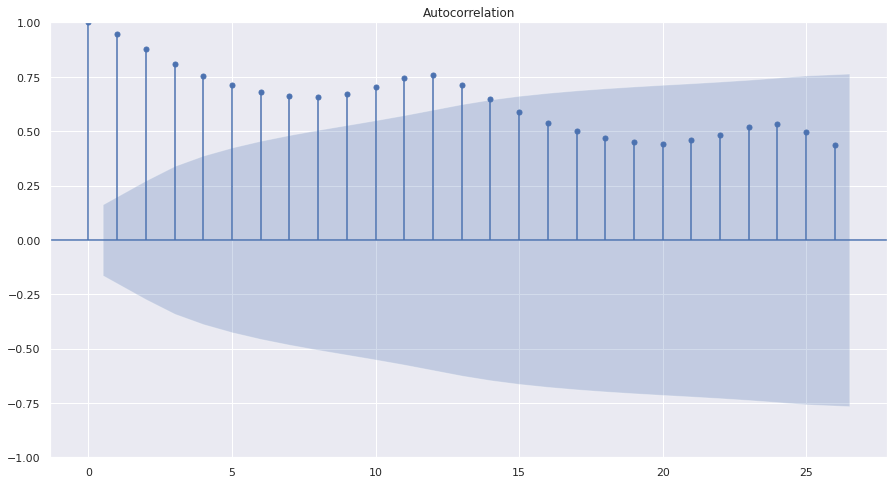

In [6]:
f.plot_acf(lags=26)
plt.show()

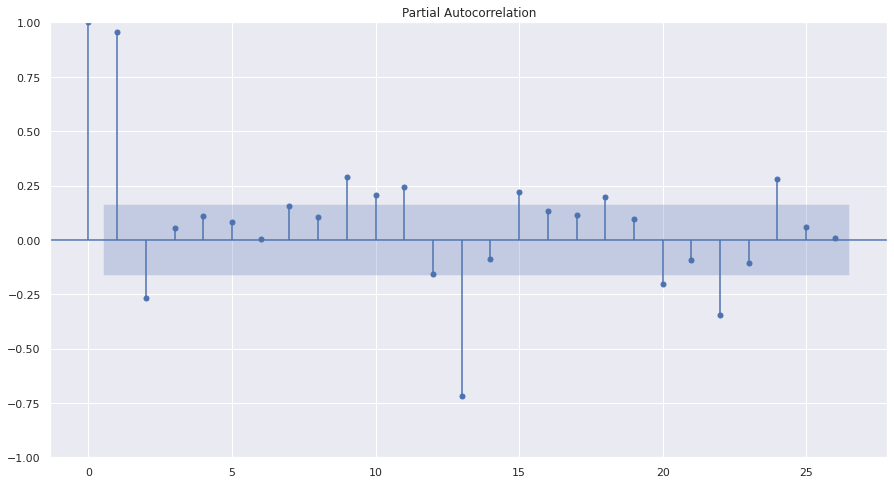

In [7]:
f.plot_pacf(lags=26)
plt.show()

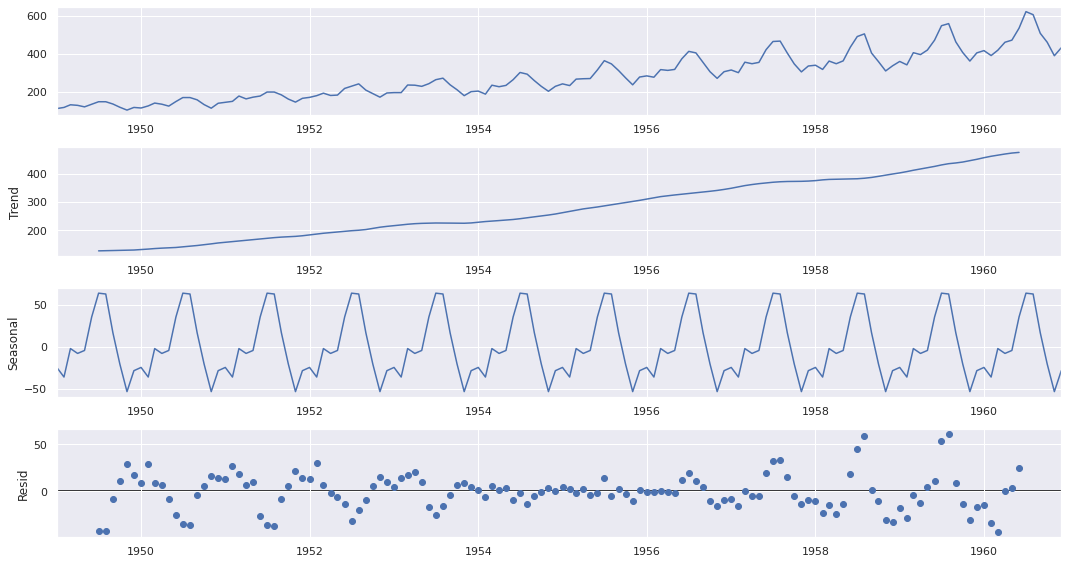

In [8]:
f.seasonal_decompose().plot()
plt.show()

In [9]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

0.8153688792060472
0.991880243437641


### LSTM Model

In [10]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator("lstm")

#### Attempt 1

2022-01-17 01:09:34.758539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-17 01:09:34.758604: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-17 01:09:37.427902: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-17 01:09:37.427954: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-17 01:09:37.427982: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4d841be84f84): /proc/driver/nvidia/version does not exist
2022-01-17 01:09:37.428264: I tensorflow/core/platform/cpu_featu

5/5 [==============================] - 2s 5ms/step - loss: 0.3367


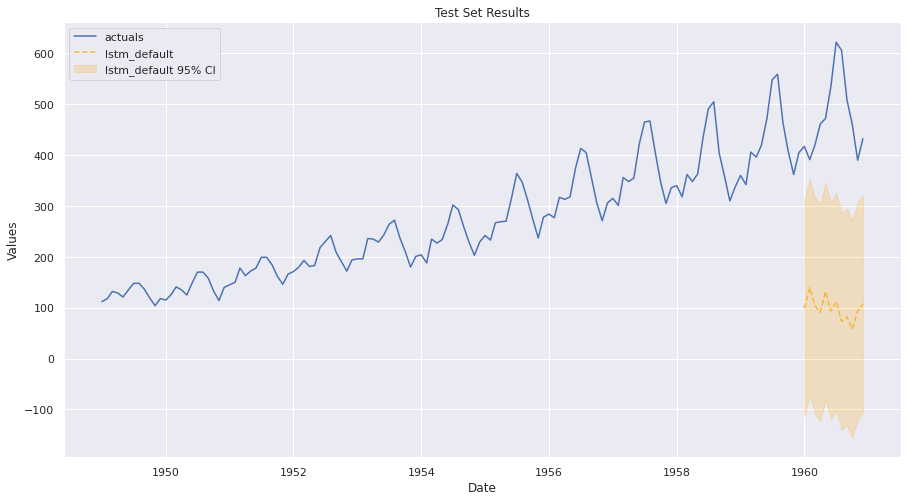

In [11]:
f.manual_forecast(call_me="lstm_default")
f.plot_test_set(ci=True)

#### Attempt 2

4/4 [==============================] - 2s 18ms/step - loss: 0.3562


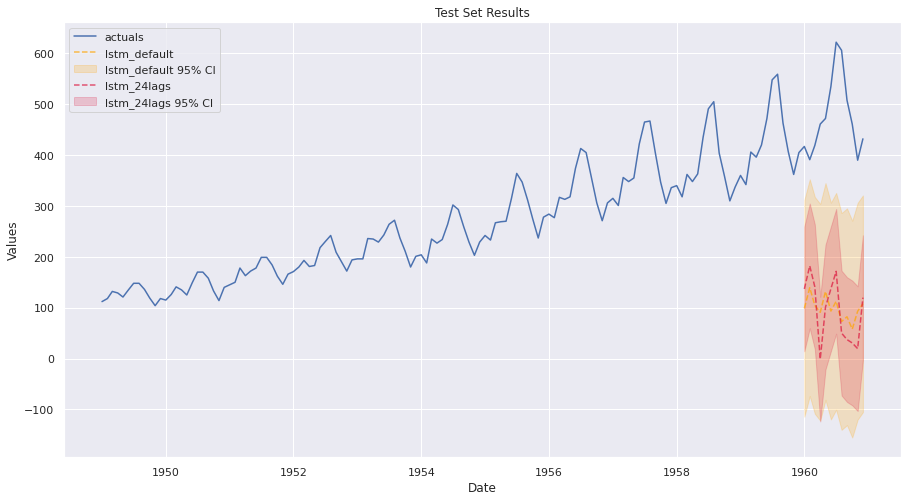

In [12]:
f.manual_forecast(call_me="lstm_24lags", lags=24)
f.plot_test_set(ci=True)

#### Attempt 3

Epoch 1/5
3/3 [==============================] - 3s 409ms/step - loss: 0.4758 - val_loss: 0.1966
Epoch 2/5
3/3 [==============================] - 0s 36ms/step - loss: 0.4665 - val_loss: 0.1897
Epoch 3/5
3/3 [==============================] - 0s 41ms/step - loss: 0.4570 - val_loss: 0.1827
Epoch 4/5
3/3 [==============================] - 0s 36ms/step - loss: 0.4474 - val_loss: 0.1755
Epoch 5/5
3/3 [==============================] - 0s 35ms/step - loss: 0.4376 - val_loss: 0.1682
Epoch 1/5
3/3 [==============================] - 3s 335ms/step - loss: 0.4171 - val_loss: 0.1621
Epoch 2/5
3/3 [==============================] - 0s 27ms/step - loss: 0.4090 - val_loss: 0.1564
Epoch 3/5
3/3 [==============================] - 0s 26ms/step - loss: 0.4006 - val_loss: 0.1506
Epoch 4/5
3/3 [==============================] - 0s 23ms/step - loss: 0.3918 - val_loss: 0.1446
Epoch 5/5
3/3 [==============================] - 0s 26ms/step - loss: 0.3828 - val_loss: 0.1387


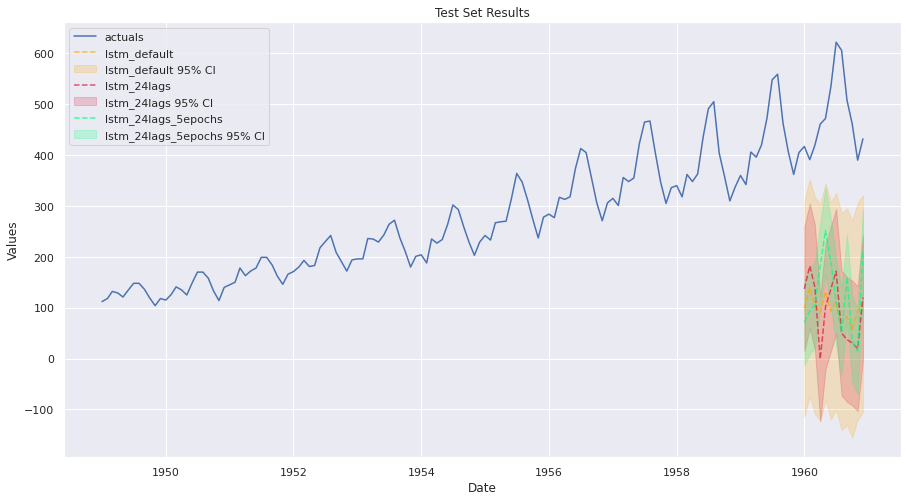

In [13]:
f.manual_forecast(
    call_me="lstm_24lags_5epochs", lags=24, epochs=5, validation_split=0.2, shuffle=True
)
f.plot_test_set(ci=True)

#### Attempt 4

Epoch 1/25
3/3 [==============================] - 6s 685ms/step - loss: 0.4502 - val_loss: 0.1821
Epoch 2/25
3/3 [==============================] - 0s 93ms/step - loss: 0.4327 - val_loss: 0.1687
Epoch 3/25
3/3 [==============================] - 0s 80ms/step - loss: 0.4125 - val_loss: 0.1523
Epoch 4/25
3/3 [==============================] - 0s 93ms/step - loss: 0.3882 - val_loss: 0.1319
Epoch 5/25
3/3 [==============================] - 0s 71ms/step - loss: 0.3577 - val_loss: 0.1100
Epoch 6/25
3/3 [==============================] - 0s 75ms/step - loss: 0.3202 - val_loss: 0.0960
Epoch 7/25
3/3 [==============================] - 0s 64ms/step - loss: 0.2799 - val_loss: 0.1029
Epoch 8/25
3/3 [==============================] - 0s 79ms/step - loss: 0.2480 - val_loss: 0.1339
Epoch 9/25
3/3 [==============================] - 0s 87ms/step - loss: 0.2286 - val_loss: 0.1597
Epoch 10/25
3/3 [==============================] - 0s 90ms/step - loss: 0.2148 - val_loss: 0.1628
Epoch 11/25
3/3 [===========

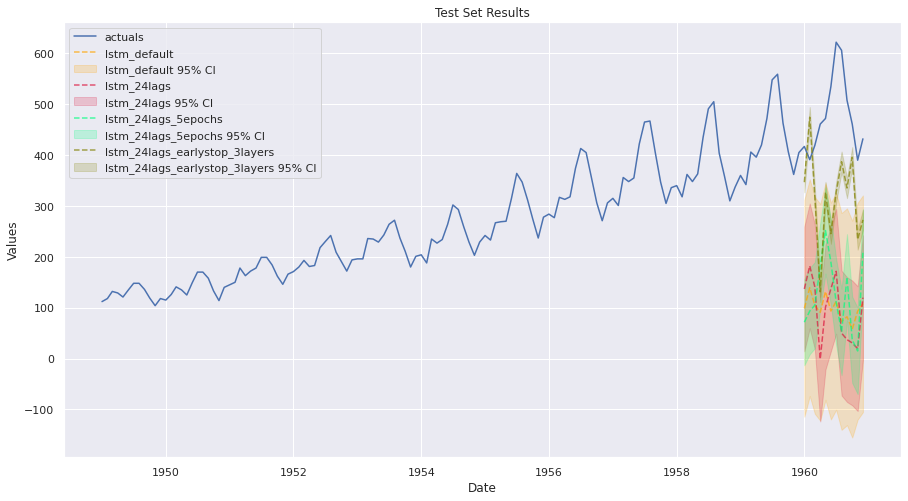

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

f.manual_forecast(
    call_me="lstm_24lags_earlystop_3layers",
    lags=24,
    epochs=25,
    validation_split=0.2,
    shuffle=True,
    callbacks=EarlyStopping(monitor="val_loss", patience=5),
    lstm_layer_sizes=(16, 16, 16),
    dropout=(0, 0, 0),
)
f.plot_test_set(ci=True)

#### Attempt 5

Epoch 1/15
3/3 [==============================] - 10s 975ms/step - loss: 0.4860 - val_loss: 0.2074
Epoch 2/15
3/3 [==============================] - 1s 215ms/step - loss: 0.3948 - val_loss: 0.1130
Epoch 3/15
3/3 [==============================] - 0s 136ms/step - loss: 0.2205 - val_loss: 0.1385
Epoch 4/15
3/3 [==============================] - 1s 263ms/step - loss: 0.1468 - val_loss: 0.0632
Epoch 5/15
3/3 [==============================] - 0s 150ms/step - loss: 0.1348 - val_loss: 0.0613
Epoch 6/15
3/3 [==============================] - 1s 219ms/step - loss: 0.1132 - val_loss: 0.0817
Epoch 7/15
3/3 [==============================] - 0s 128ms/step - loss: 0.1033 - val_loss: 0.0580
Epoch 8/15
3/3 [==============================] - 1s 176ms/step - loss: 0.0999 - val_loss: 0.0532
Epoch 9/15
3/3 [==============================] - 1s 164ms/step - loss: 0.0955 - val_loss: 0.0519
Epoch 10/15
3/3 [==============================] - 1s 287ms/step - loss: 0.0946 - val_loss: 0.0510
Epoch 11/15
3/3 [=

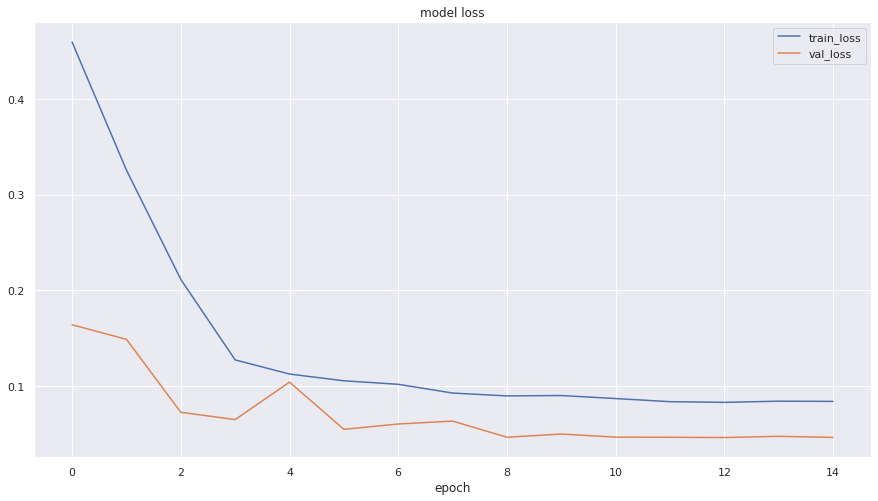

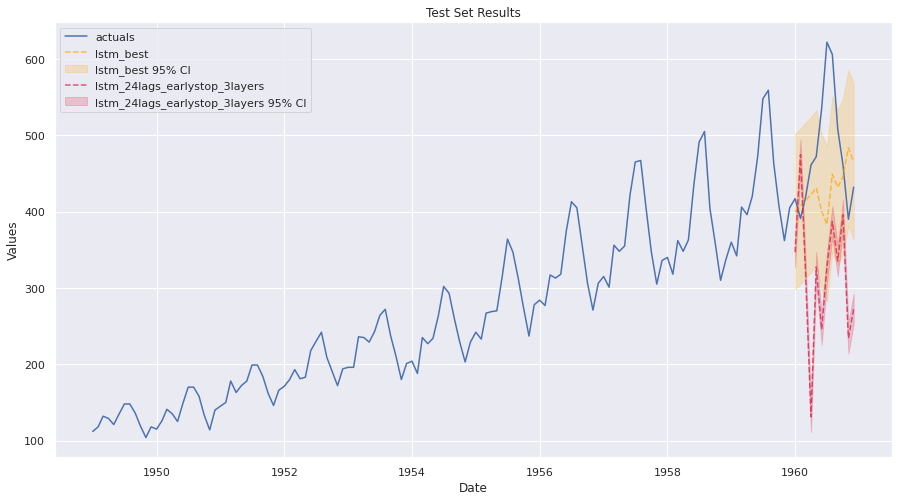

In [15]:
f.manual_forecast(
    call_me="lstm_best",
    lags=36,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    shuffle=True,
    activation="tanh",
    optimizer="Adam",
    learning_rate=0.001,
    lstm_layer_sizes=(72,) * 4,
    dropout=(0,) * 4,
    plot_loss=True,
)
f.plot_test_set(order_by="LevelTestSetMAPE", models="top_2", ci=True)

### MLR Modeling

In [16]:
f.set_estimator("mlr")
f.add_ar_terms(24)
f.add_seasonal_regressors("month", "quarter", dummy=True)
f.add_seasonal_regressors("year")
f.add_time_trend()
f.diff()

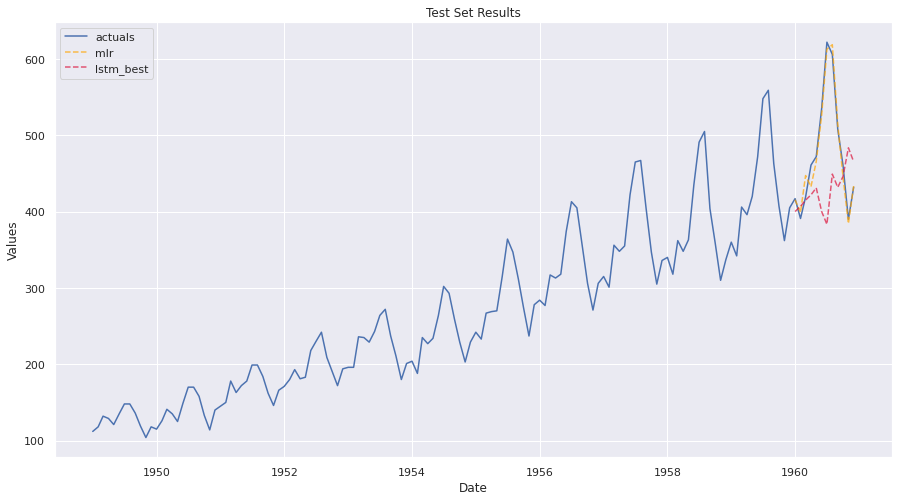

In [17]:
f.manual_forecast()
f.plot_test_set(order_by="LevelTestSetMAPE", models="top_2")

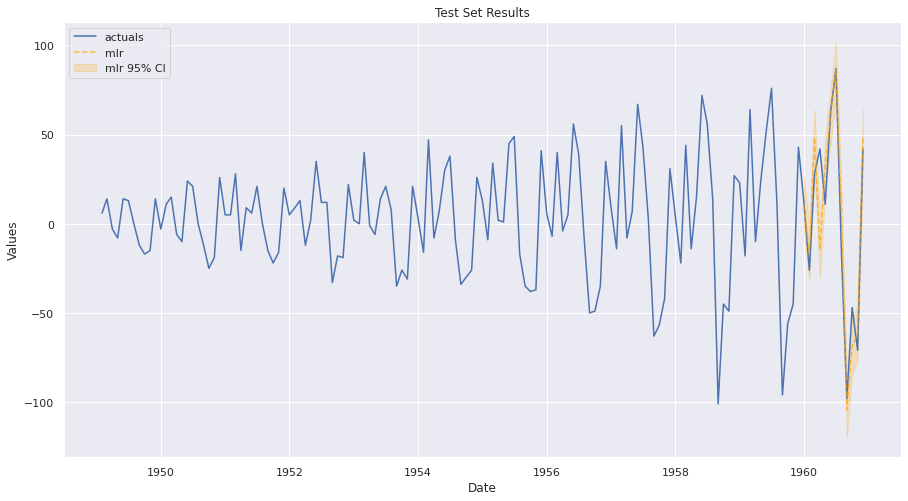

In [18]:
f.plot_test_set(models="mlr", ci=True)

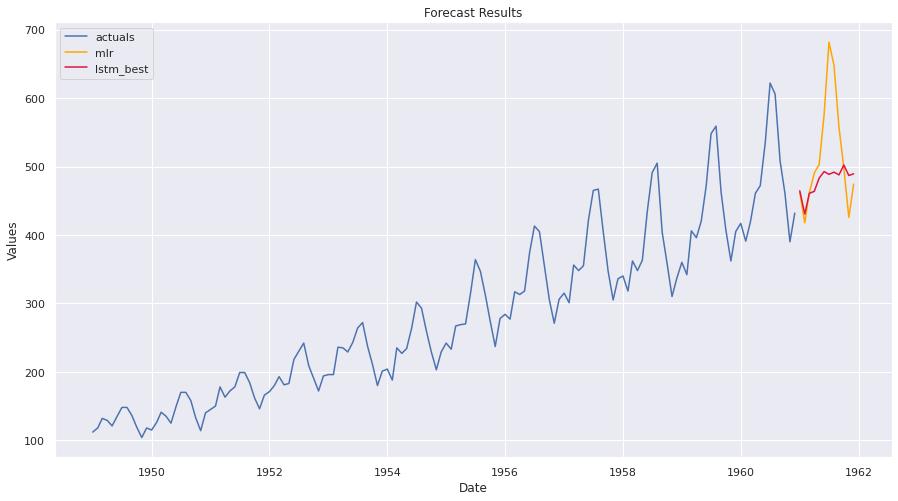

In [19]:
f.plot(order_by="LevelTestSetMAPE", models="top_2")

### Benchmarking

In [20]:
f.export("model_summaries", determine_best_by="LevelTestSetMAPE")[
    [
        "ModelNickname",
        "LevelTestSetMAPE",
        "LevelTestSetRMSE",
        "LevelTestSetR2",
        "best_model",
    ]
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.023420,13.932124,0.964960,True
1,lstm_best,0.138040,99.747249,-0.796112,False
2,lstm_24lags_earlystop_3layers,0.355749,194.534586,-5.831645,False
3,lstm_24lags_5epochs,0.739607,366.455564,-23.242324,False
4,lstm_default,0.785691,386.395684,-25.952319,False
5,lstm_24lags,0.797862,393.893286,-27.008430,False


### Export Results

In [21]:
f.export_forecasts_with_cis("mlr")

,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname
0,1961-01-01,45.884691,30.246319,14.607946,mlr
1,1961-02-01,-28.884359,-44.522731,-60.161104,mlr
2,1961-03-01,59.316311,43.677939,28.039567,mlr
3,1961-04-01,44.701798,29.063425,13.425053,mlr
4,1961-05-01,28.035762,12.397390,-3.240983,mlr
5,1961-06-01,88.898357,73.259985,57.621613,mlr
6,1961-07-01,121.179198,105.540825,89.902453,mlr
7,1961-08-01,-17.948772,-33.587144,-49.225516,mlr
8,1961-09-01,-74.893952,-90.532325,-106.170697,mlr
9,1961-10-01,-43.734425,-59.372797,-75.011170,mlr


In [22]:
f.export_test_set_preds_with_cis("mlr")

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname
0,1960-01-01,26.240083,10.601711,12.0,-5.036662,mlr
1,1960-02-01,-1.084724,-16.723097,-26.0,-32.361469,mlr
2,1960-03-01,64.060343,48.421971,28.0,32.783598,mlr
3,1960-04-01,1.072162,-14.566210,42.0,-30.204583,mlr
4,1960-05-01,48.522317,32.883945,11.0,17.245572,mlr
5,1960-06-01,76.536402,60.898029,63.0,45.259657,mlr
6,1960-07-01,101.843022,86.204650,87.0,70.566277,mlr
7,1960-08-01,21.643568,6.005196,-16.0,-9.633177,mlr
8,1960-09-01,-88.607099,-104.245472,-98.0,-119.883844,mlr
9,1960-10-01,-52.982698,-68.621071,-47.0,-84.259443,mlr


### Export Feature Info

In [23]:
f.save_feature_importance()
f.export_feature_importance("mlr")

,weight,std
feature,,
AR1,0.379339,0.025507
AR4,0.213123,0.030143
AR12,0.210817,0.025061
AR10,0.160166,0.014423
AR18,0.118081,0.009412
AR21,0.113975,0.015216
AR13,0.112161,0.008052
AR2,0.106327,0.013276
AR20,0.089004,0.015634
